In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

ARIMA(8:2)

In [3]:
data = pd.read_csv('VietTri.csv')

# Chuyển đổi cột 'date' thành định dạng thời gian
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data = data.loc[(data['date'] >= '2019-01-03') & (data['date'] <= '2024-01-03')]
data['date'] = data['date'].dt.strftime('%d-%m-%Y')
data

,Index,date,pm25,pm10,o3,no2,so2,co,AQI
715,715,12-01-2019,67,34,23,8,2,8,67
716,716,13-01-2019,67,34,23,8,2,8,67
717,717,26-10-2019,81,47,22,11,19,11,81
718,718,27-10-2019,102,29,22,10,19,11,102
719,719,28-10-2019,69,24,22,10,19,11,69
...,...,...,...,...,...,...,...,...,...
2195,2195,08-09-2023,22,13,28,3,4,3,28
2196,2196,09-09-2023,20,14,28,2,4,3,28
2197,2197,01-01-2024,75,48,23,3,9,8,75
2206,2206,02-01-2024,81,29,23,7,10,8,81


In [4]:
train_size = int(0.8*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10457.896, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10741.273, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10606.018, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10515.926, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10739.273, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10445.062, Time=0.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10480.602, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10456.091, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10483.992, Time=0.62 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10478.957, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10449.947, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10438.191, Time=1.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10409.745, Time=1.71 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10426.726, Time=1.84 sec
 ARIMA(4,1,3)(0,0,0

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True)

In [5]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))

In [6]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[47.29150274 47.43577086 48.55297577 47.35926225 50.85464439 51.21753579
 50.46606822 52.76295611 50.83364394 50.26853102 51.3603609  48.99765841
 49.77782025 50.37130987 48.78314526 50.54189334 50.32357105 49.45547943
 51.12912998 49.98411748 49.80451049 50.91076199 49.41121689 50.00733405
 50.46835287 49.20910615 50.33359955 50.11553425 49.37213771 50.55252833]
Predicted closing prices for the next 60 days:
[47.29150274 47.43577086 48.55297577 47.35926225 50.85464439 51.21753579
 50.46606822 52.76295611 50.83364394 50.26853102 51.3603609  48.99765841
 49.77782025 50.37130987 48.78314526 50.54189334 50.32357105 49.45547943
 51.12912998 49.98411748 49.80451049 50.91076199 49.41121689 50.00733405
 50.46835287 49.20910615 50.33359955 50.11553425 49.37213771 50.55252833
 49.76652285 49.62363288 50.49062703 49.45353198 49.86833685 50.2437948
 49.31118957 50.08463582 49.94219832 49.35796142 50.19844017 49.64958608
 49.51230783 50.15861568 49.42

In [7]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 27.706518755158463
MAE: 21.407871201195952
MAPE: 42.94586799451292


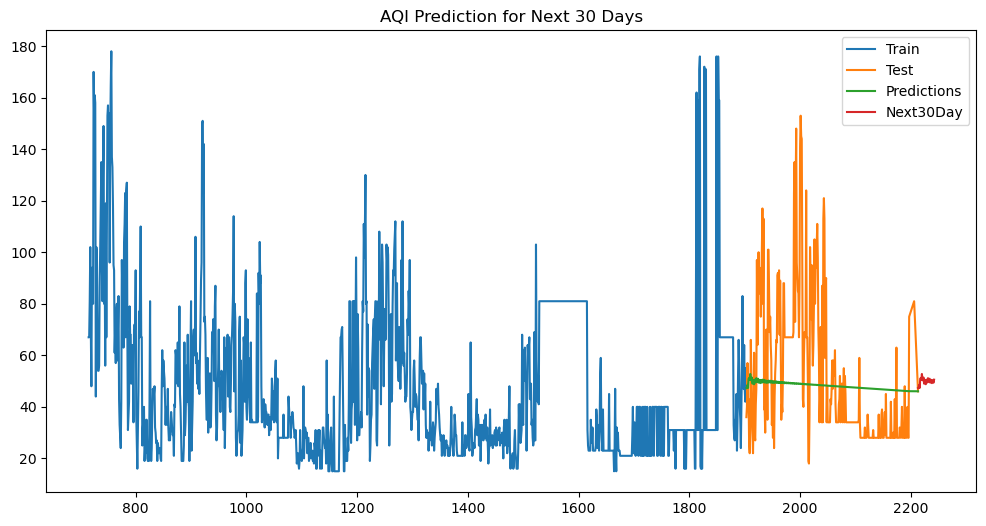

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

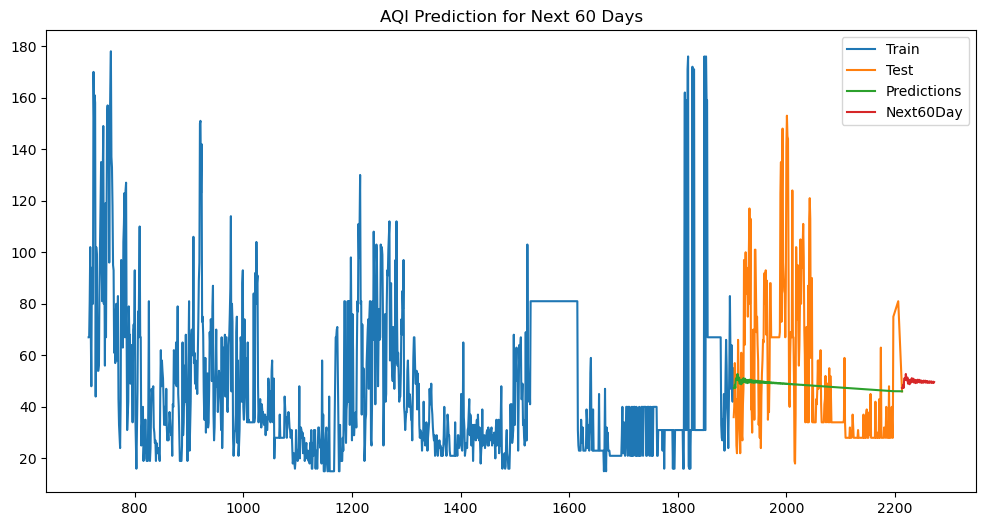

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60, y_next_60_days)
plt.title('AQI Prediction for Next 60 Days')
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

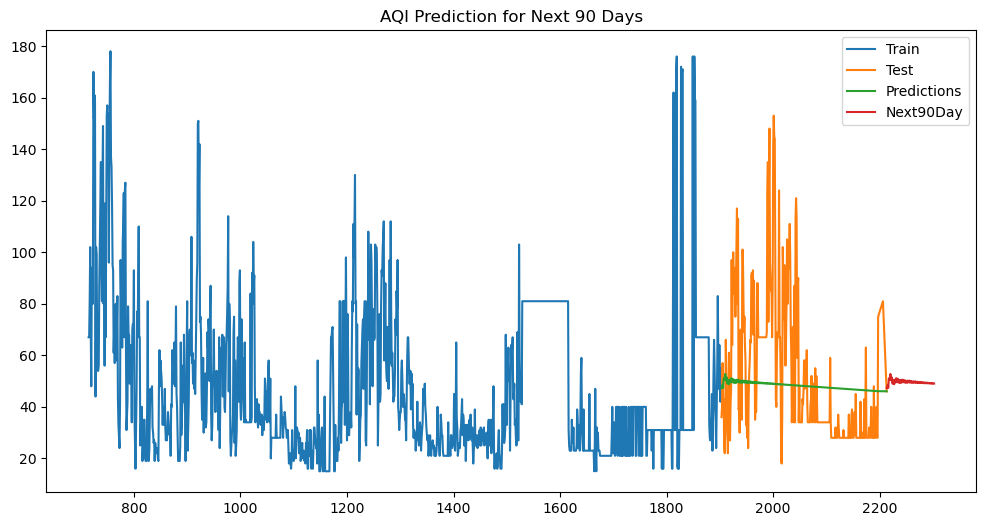

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90, y_next_90_days)
plt.title('AQI Prediction for Next 90 Days')
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

ARIMA(7:3)

In [11]:
train_size = int(0.7*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8730.545, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8912.172, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8829.154, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8793.226, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8910.174, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8726.412, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8774.393, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8731.914, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8767.631, Time=0.74 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8758.953, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8726.914, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8729.393, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=8724.789, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8772.424, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[35.44867939 34.63883736 34.09099637 33.72039354 33.46968857 33.30009197
 33.18536346 33.10775205 33.05524958 33.01973276 32.99570639 32.97945306
 32.96845803 32.96102012 32.95598853 32.95258477 32.95028219 32.94872455
 32.94767084 32.94695803 32.94647582 32.94614962 32.94592896 32.94577968
 32.9456787  32.94561038 32.94556417 32.94553291 32.94551176 32.94549746]
Predicted closing prices for the next 60 days:
[35.44867939 34.63883736 34.09099637 33.72039354 33.46968857 33.30009197
 33.18536346 33.10775205 33.05524958 33.01973276 32.99570639 32.97945306
 32.96845803 32.96102012 32.95598853 32.95258477 32.95028219 32.94872455
 32.94767084 32.94695803 32.94647582 32.94614962 32.94592896 32.94577968
 32.9456787  32.94561038 32.94556417 32.94553291 32.94551176 32.94549746
 32.94548778 32.94548123 32.9454768  32.94547381 32.94547178 32.94547041
 32.94546948 32.94546885 32.94546843 32.94546814 32.94546795 32.94546782
 32.94546773 32.94546767 32.9

In [13]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 36.37047321405522
MAE: 21.761477739660652
MAPE: 31.39283814184035


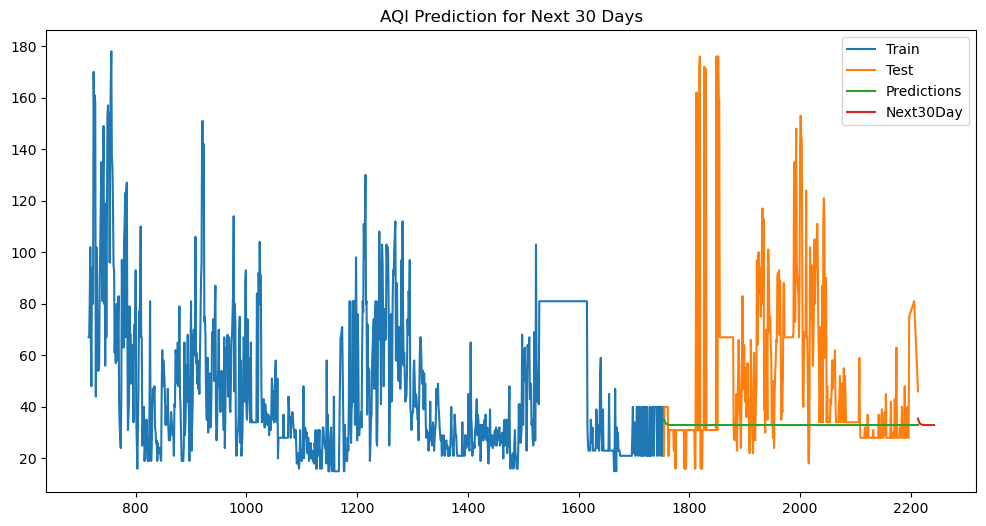

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

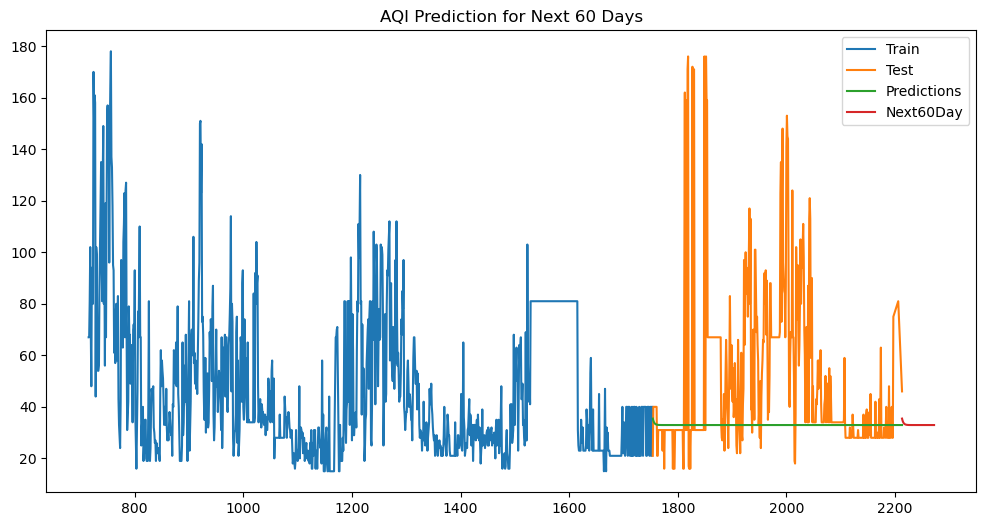

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60, y_next_60_days)
plt.title('AQI Prediction for Next 60 Days')
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

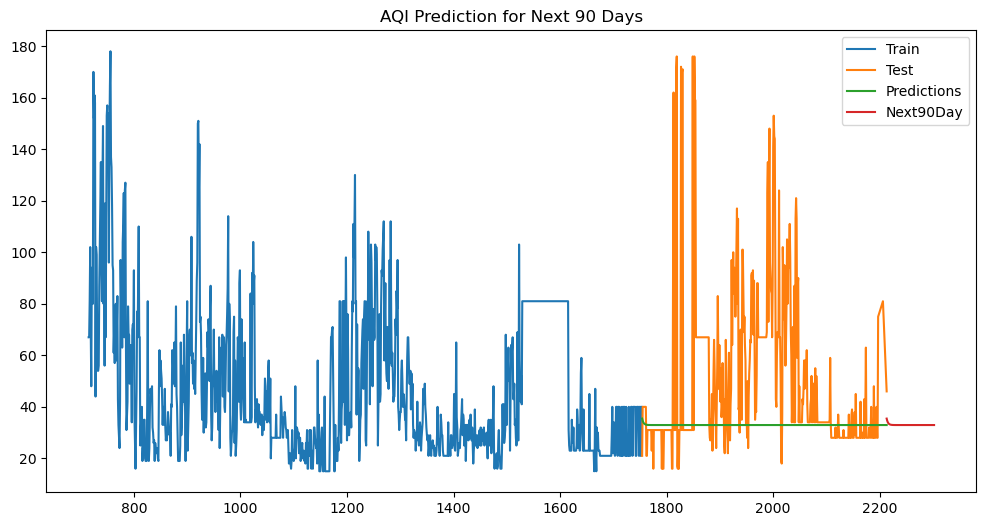

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90, y_next_90_days)
plt.title('AQI Prediction for Next 90 Days')
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

ARIMA(9:1)

In [17]:
train_size = int(0.9*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11818.778, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12120.616, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11982.773, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11897.986, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12118.618, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11806.028, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11852.437, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11815.757, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11807.274, Time=1.80 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11846.392, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11809.420, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11800.588, Time=1.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11773.911, Time=2.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11790.487, Time=1.10 sec
 ARIMA(4,1,3)(0,0,0

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[49.30270155 57.26037556 60.52254152 67.66961991 69.8338619  69.16204768
 70.76194759 67.51048822 66.04715116 67.48764692 65.69872839 67.32406998
 68.93893634 67.27261258 68.76829126 68.33470751 66.59774612 68.20187887
 67.26614631 66.87172497 68.61044833 67.30445167 67.6229481  68.54066506
 66.95673579 67.82391661 68.05498357 66.88004467 68.17060187 67.78713077]
Predicted closing prices for the next 60 days:
[49.30270155 57.26037556 60.52254152 67.66961991 69.8338619  69.16204768
 70.76194759 67.51048822 66.04715116 67.48764692 65.69872839 67.32406998
 68.93893634 67.27261258 68.76829126 68.33470751 66.59774612 68.20187887
 67.26614631 66.87172497 68.61044833 67.30445167 67.6229481  68.54066506
 66.95673579 67.82391661 68.05498357 66.88004467 68.17060187 67.78713077
 67.14495497 68.35299878 67.44646723 67.38156066 68.26642842 67.19826362
 67.6890461  68.11013434 67.14962588 67.96281445 67.86350746 67.20973194
 68.10288039 67.60106299 67.3

In [19]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 34.08133689506406
MAE: 32.95337961140931
MAPE: 104.88566810247913


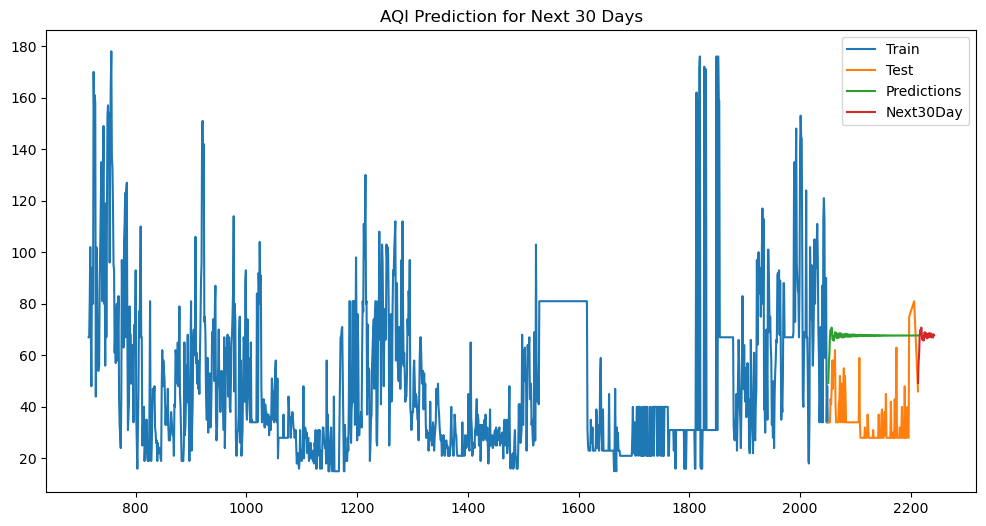

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

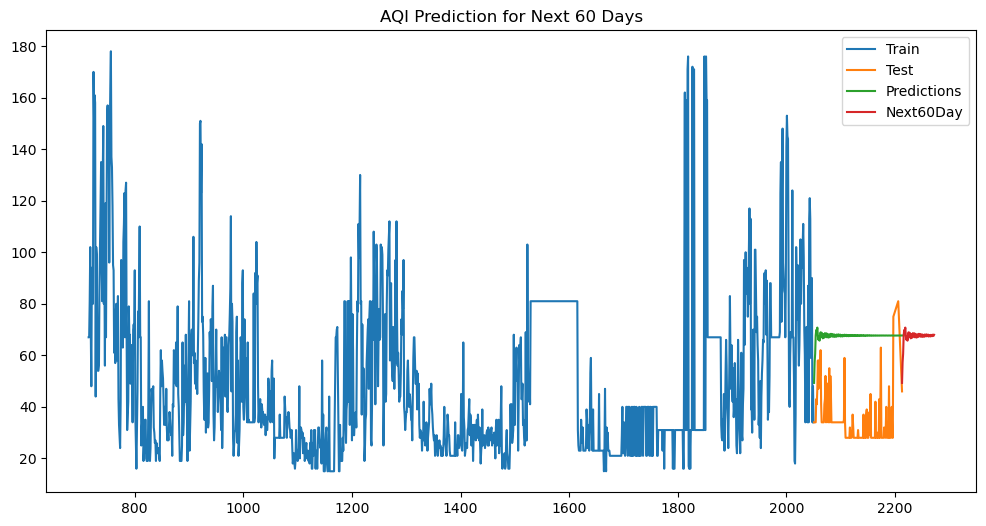

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60, y_next_60_days)
plt.title('AQI Prediction for Next 60 Days')
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

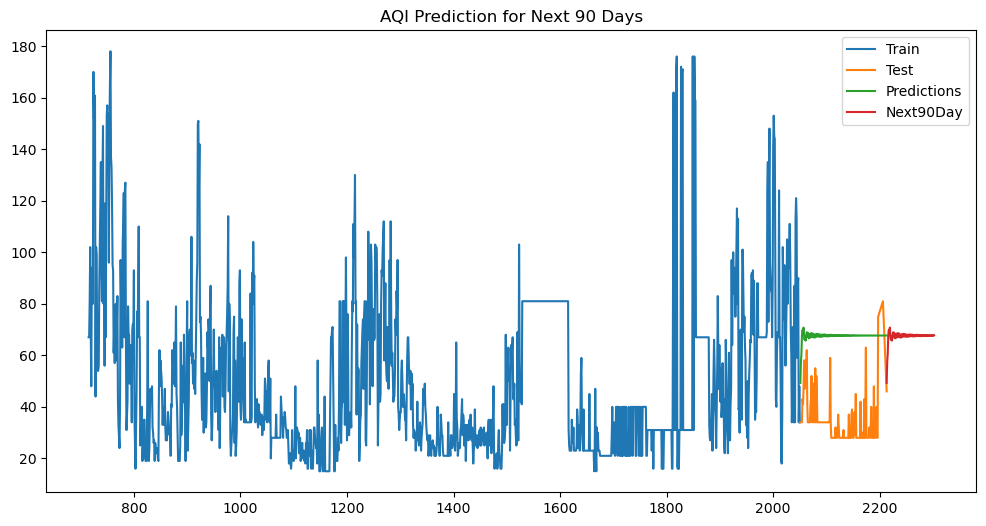

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90, y_next_90_days)
plt.title('AQI Prediction for Next 90 Days')
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()